In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 16,10
import seaborn as sb

pd.set_option('display.max_columns', 100)

from sklearn import cross_validation, metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('C:/Hari Docs/Dataset/houseprices_train.csv')
test = pd.read_csv('C:/Hari Docs/Dataset/houseprices_test.csv')
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [3]:
train['source'] = 'train'
test['source'] = 'test'
print(train.shape, test.shape)

(1460, 82) (1459, 81)


In [4]:
df = pd.concat([train, test])
df.shape

(2919, 82)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D8DB54208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022D93C10940>]], dtype=object)

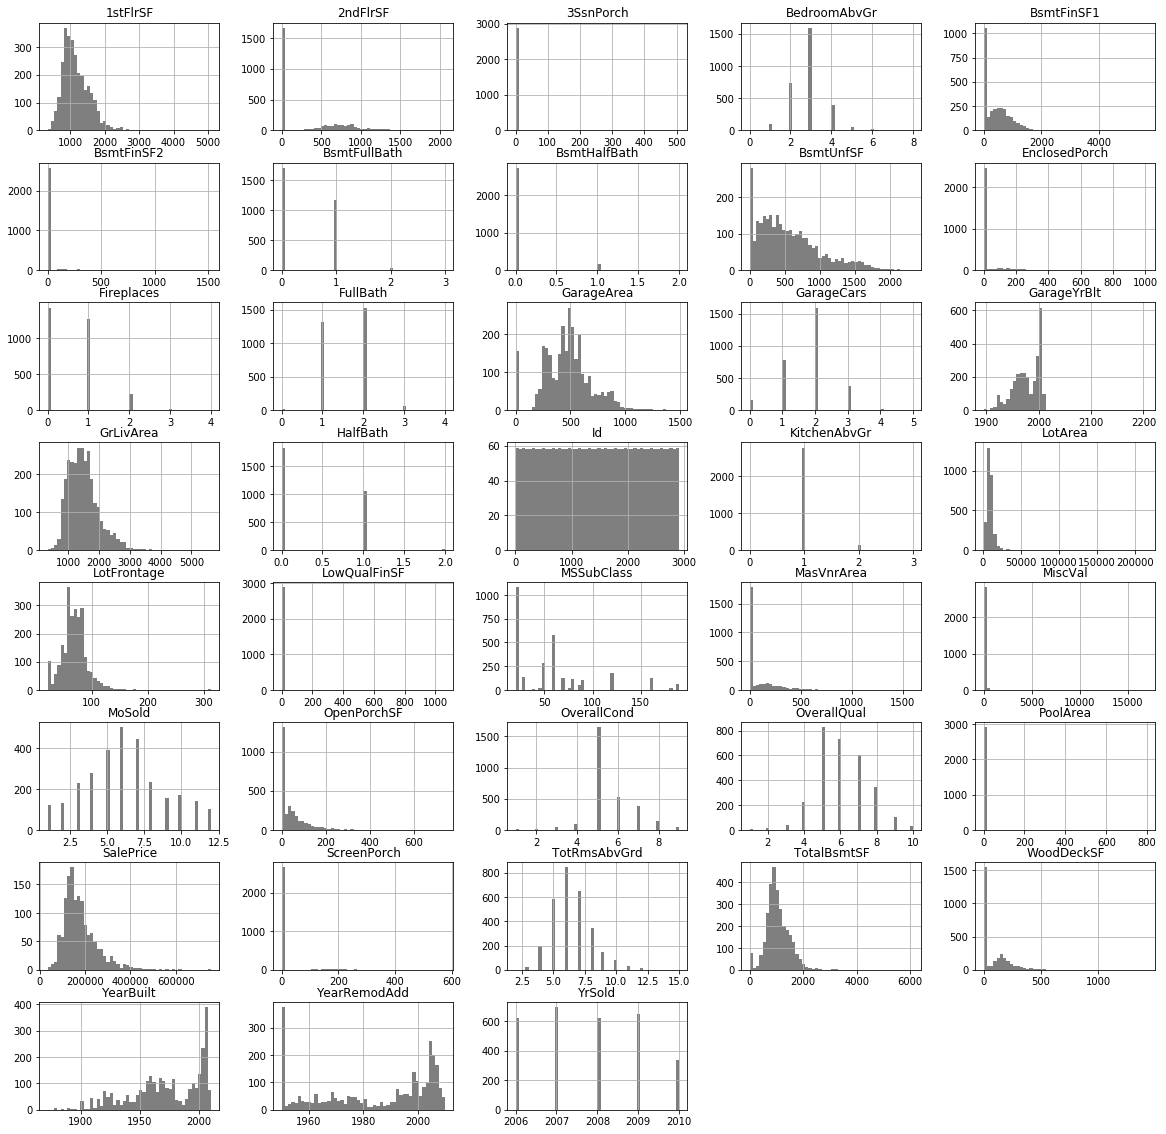

In [18]:
df.hist(layout=(8,5),color='k', alpha=0.5, bins=50)

In [21]:
df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [5]:
#percentage of missing values
null_df = df.columns[df.isnull().any()]
num = df[null_df].isnull().sum()
round(num/2919, 2)

Alley           0.93
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinSF1      0.00
BsmtFinSF2      0.00
BsmtFinType1    0.03
BsmtFinType2    0.03
BsmtFullBath    0.00
BsmtHalfBath    0.00
BsmtQual        0.03
BsmtUnfSF       0.00
Electrical      0.00
Exterior1st     0.00
Exterior2nd     0.00
Fence           0.80
FireplaceQu     0.49
Functional      0.00
GarageArea      0.00
GarageCars      0.00
GarageCond      0.05
GarageFinish    0.05
GarageQual      0.05
GarageType      0.05
GarageYrBlt     0.05
KitchenQual     0.00
LotFrontage     0.17
MSZoning        0.00
MasVnrArea      0.01
MasVnrType      0.01
MiscFeature     0.96
PoolQC          1.00
SalePrice       0.50
SaleType        0.00
TotalBsmtSF     0.00
Utilities       0.00
dtype: float64

In [6]:
#drop columns with missing features more than 50%
df.drop(['Alley', 'Fence', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)
df.shape

(2919, 78)

In [7]:
#percentage of zero values
zero_df = df.columns[(df == 0).any()]
num = (df[zero_df] == 0).sum()
#den = len(zero_df)
round(num/2919, 2)

2ndFlrSF         0.57
3SsnPorch        0.99
BedroomAbvGr     0.00
BsmtFinSF1       0.32
BsmtFinSF2       0.88
BsmtFullBath     0.58
BsmtHalfBath     0.94
BsmtUnfSF        0.08
EnclosedPorch    0.84
Fireplaces       0.49
FullBath         0.00
GarageArea       0.05
GarageCars       0.05
HalfBath         0.63
KitchenAbvGr     0.00
LowQualFinSF     0.99
MasVnrArea       0.60
MiscVal          0.96
OpenPorchSF      0.44
PoolArea         1.00
ScreenPorch      0.91
TotalBsmtSF      0.03
WoodDeckSF       0.52
dtype: float64

In [ ]:
#3SsnPorch zeros = 99%. Zero value denotes not available. This can be removed
#BsmtHalfBath zeros = 94% ; Zero value denotes not available and can be removed
#EnclosedPorch zeros = 84% ; Zero value denotes not available and can be removed
#LowQualFinSF zeros = 99% ; Zero value denotes not available and can be removed
#MiscVal zeros = 96% ; Zero value denotes not available and can be removed
#PoolArea zeros ~ 100% ; Zero value denotes not available and can be removed
#ScreenPorch zeros = 91% ; Zero value denotes not available andcan be removed

In [8]:
#drop columns with zero values more than 50% which are also considered as missing values
df.drop(['3SsnPorch', 'BsmtHalfBath', 'EnclosedPorch', 'LowQualFinSF','MiscVal','PoolArea','ScreenPorch'], axis=1, inplace=True)
df.shape

(2919, 71)

In [52]:
df.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,MSSubClass,MasVnrArea,MoSold,OpenPorchSF,OverallCond,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2918.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.860226,441.423235,49.582248,0.429894,560.772104,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,57.137718,102.201312,6.213087,47.486811,5.564577,6.089072,180921.195890,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,0.822693,455.610826,169.205611,0.524736,439.543659,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,42.517628,179.334253,2.714762,67.575493,1.113131,1.409947,79442.502883,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,20.000000,0.000000,1.000000,0.000000,1.000000,1.000000,34900.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,2.000000,0.000000,0.000000,0.000000,220.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,20.000000,0.000000,4.000000,0.000000,5.000000,5.000000,129975.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,3.000000,368.500000,0.000000,0.000000,467.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,50.000000,0.000000,6.000000,26.000000,5.000000,6.000000,163000.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,3.000000,733.000000,0.000000,1.000000,805.500000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,70.000000,164.000000,8.000000,70.000000,6.000000,7.000000,214000.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,8.000000,5644.000000,1526.000000,3.000000,2336.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,190.000000,1600.000000,12.000000,742.000000,9.000000,10.000000,755000.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [9]:
#Categorical variable data
cat = df.dtypes[df.dtypes == 'object'].index
df[cat].describe()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities,source
count,2919,2837,2837,2840,2839,2838,2919,2919,2919,2918,2919,2919,2918,2918,1499,2919,2917,2760,2760,2760,2762,2919,2919,2919,2918,2919,2919,2919,2919,2915,2895,2919,2919,2919,2919,2919,2918,2919,2917,2919
unique,5,4,4,6,6,4,2,9,8,5,5,4,15,16,5,6,7,5,3,5,6,6,5,8,4,4,3,5,4,5,4,25,3,8,6,6,9,2,2,2
top,1Fam,TA,No,Unf,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,Gd,PConc,Typ,TA,Unf,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,Inside,Reg,RL,None,NAmes,Y,CompShg,Gable,Normal,WD,Pave,AllPub,train
freq,2425,2606,1904,851,2493,1283,2723,2511,2889,2671,2538,1798,1025,1014,744,1308,2717,2654,1230,2604,1723,2874,1493,1471,1492,2622,2778,2133,1859,2265,1742,443,2641,2876,2310,2402,2525,2907,2916,1460


In [23]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

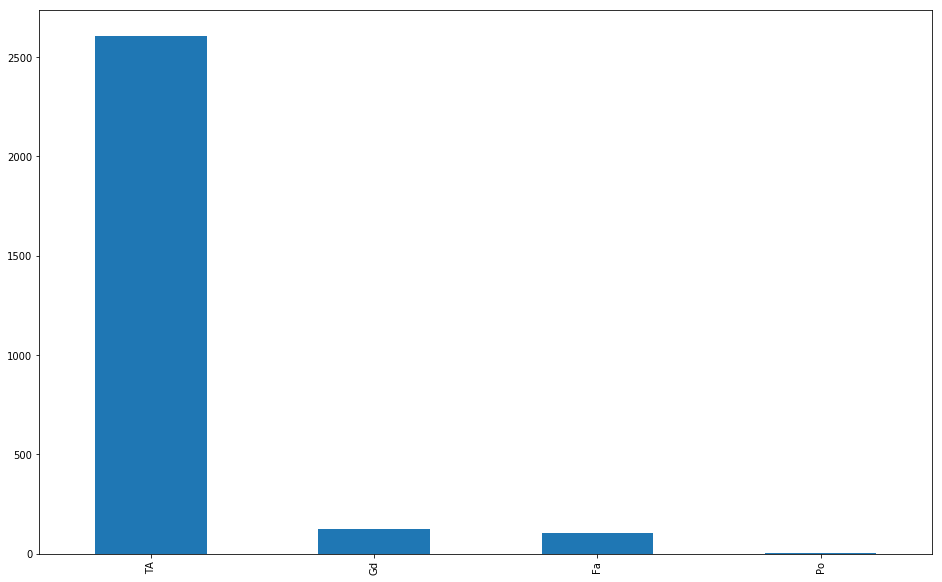

In [22]:
df['BsmtCond'].value_counts().plot(kind='bar')

In [72]:
# BsmtCond variable has 89% times same value
#'CentralAir' variable has 93% times same value
# Condition2 variable has 98% times same value
# Electrical variable has 89% times same value
# Functional variable has 93% times same value
# GarageCond variable has 91% times same value
# GarageQual variable has 89% times same value
# Heating variable has 98% times same value
# LandContour variable has 89% times same value
# LandSlope variable has 95% times same value
# PavedDrive variable has 90% times same value
# RoofMatl variable has 98% times same value
# Street variable has 99% times same value
# Utilities variable is just same for all the data

In [24]:
#Based on above removing the columns
cols = ['BsmtCond','CentralAir','Condition2','Electrical','Functional','GarageCond','GarageQual','Heating','LandContour','LandSlope',
        'PavedDrive','RoofMatl','Street','Utilities']
df.drop(cols, axis=1, inplace=True)
df.shape

(2919, 57)

In [39]:
df.to_csv('C:/Hari Docs/Dataset/ames_df.csv', index=False)

In [80]:
df.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
BedroomAbvGr        0
BldgType            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1        0
BsmtFinType2        1
BsmtFullBath        0
BsmtQual            2
BsmtUnfSF           0
Condition1          0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
FireplaceQu         0
Fireplaces          0
Foundation          0
FullBath            0
GarageArea          1
GarageCars          1
GarageFinish      159
GarageType        157
GarageYrBlt       159
GrLivArea           0
HalfBath            0
HeatingQC           0
HouseStyle          0
Id                  0
KitchenAbvGr        0
KitchenQual         1
LotArea             0
LotConfig           0
LotFrontage       486
LotShape            0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQua

In [56]:
#Slicing all the metrics related to basement.
# We will be making all the basement metrics as 'NoBasemnt' where NA for 'BsmtExposure' means No Basement.
#Numerice metrics based on basement are made zero to align
rows = df['BsmtExposure'].isnull()
bsmt_col = ['BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtFinType1','BsmtFinType2','BsmtFullBath',
            'BsmtQual','BsmtUnfSF'] 
df.loc[rows, bsmt_col]


,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,BsmtUnfSF


In [43]:
print('Before: ',df['BsmtExposure'].isnull().sum())
df.loc[rows, 'BsmtExposure'] = 'NoBasemnt'
print('After: ',df['BsmtExposure'].isnull().sum())

Before:  82
After:  0


In [44]:
print('Before: ',df['BsmtFinType1'].isnull().sum())
df.loc[rows, ['BsmtFinType1','BsmtFinType2']] = 'NoBasemnt'
print('After: ',df['BsmtFinType1'].isnull().sum())

Before:  79
After:  0


In [45]:
print('Before: ',df['BsmtQual'].isnull().sum())
df.loc[rows, 'BsmtQual'] = 'NoBasemnt'
print('After: ',df['BsmtQual'].isnull().sum())

Before:  81
After:  2


In [51]:
print('Before: ',df['BsmtFinSF1'].isnull().sum())
df.loc[rows, ['BsmtFinSF1','BsmtFinSF2']] = 0
print('After: ',df['BsmtFinSF1'].isnull().sum())

Before:  1
After:  0


In [55]:
df['BsmtFinType1'] = df['BsmtFinType1'].replace(0, 'NoBasemnt')
print(df['BsmtFinType1'].value_counts())
df['BsmtFinType2'] = df['BsmtFinType2'].replace(0, 'NoBasemnt')
print(df['BsmtFinType2'].value_counts())

GLQ          849
Unf          848
ALQ          429
Rec          288
BLQ          269
LwQ          154
NoBasemnt     82
Name: BsmtFinType1, dtype: int64
Unf          2490
Rec           105
LwQ            87
NoBasemnt      82
BLQ            68
ALQ            52
GLQ            34
Name: BsmtFinType2, dtype: int64


In [79]:
#Filling missing values for FireplaceQu. Fireplaces = 0 ; this equals no fireplace. Hence filling the same
#NF = No Fireplace
fireplace_miss = (df['Fireplaces'] == 0)
print('Before: ', df['FireplaceQu'].isnull().sum())
df.loc[fireplace_miss,'FireplaceQu'] = 'NF'
print('After: ', df['FireplaceQu'].isnull().sum())

Before:  1420
After:  0


In [89]:
df.groupby('LotConfig').LotFrontage.mean()

LotConfig
Corner     82.690418
CulDSac    56.775281
FR2        61.276923
FR3        79.300000
Inside     67.205693
Name: LotFrontage, dtype: float64

In [90]:
# Filling missing values of LotFrontage with mean of grouped by values of LotConfig
print('Before: ', df['LotFrontage'].isnull().sum())
df['LotFrontage'].fillna(df.groupby('LotConfig')['LotFrontage'].transform("mean"), inplace=True)
print('After: ', df['LotFrontage'].isnull().sum())

Before:  486
After:  0


In [16]:
#Initial test of Linear regression
train_sub = df.loc[df['source'] == 'train'].copy()
train_sub.shape

(1460, 56)

In [17]:
train_sub.drop(['source'], axis = 1, inplace=True)
train_sub.shape

(1460, 55)

In [27]:
lg = LinearRegression(normalize=True)
target = train_sub['SalePrice']
predictor = train_sub.iloc[:,train_sub.columns != 'SalePrice']
lg.fit(train_sub[predictor], train_sub[target])
print (lg.score(train_sub[predictor], train_sub[target]))
prediction = lg.predict(train_sub[predictor])
rmse = np.sqrt(metrics.mean_squared_error(train_sub[target].values, prediction))
print ('RMSE: ', rmse)

ValueError: Must pass DataFrame with boolean values only

In [31]:
#Imputing missing values
#Lot frontage - taking mean values
print ('Before: ',df['LotFrontage'].isnull().sum())
LF_mean = round(df['LotFrontage'].mean())
df['LotFrontage'].fillna(LF_mean, inplace=True)
print ('After: ',df['LotFrontage'].isnull().sum())

Before:  486
After:  0


In [37]:
#Garage Finish
print ('Before: ',df['GarageFinish'].isnull().sum())
df['GarageFinish'].fillna('NoGarage', inplace=True)
print ('Before: ',df['GarageFinish'].isnull().sum())

Before:  159
Before:  0


In [38]:
#GarageType        157
print ('Before: ',df['GarageType'].isnull().sum())
df['GarageType'].fillna('NoGarage', inplace=True)
print ('Before: ',df['GarageType'].isnull().sum())

Before:  157
Before:  0


In [ ]:
#GarageYrBlt       159
print ('Before: ',df['GarageType'].isnull().sum())
df['GarageType'].fillna('NoGarage', inplace=True)
print ('Before: ',df['GarageType'].isnull().sum())